# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 11__

__Nombres de los estudiantes: Arturo Ibáñez y Jorge del Valle__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [1]:
RANDOM_STATE=333

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [2]:
import pandas as pd
filename='airbnb.csv'

#Carga el conjunto de datos en un dataframe
df = pd.read_csv(filename)
df=df.dropna(axis='rows',how='any')
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,14998.0,2.880317,1.298492,1.000000,2.000000,2.000000,4.000000,17.000000
bathrooms,14998.0,1.116215,0.343442,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,14998.0,1.390919,0.839649,0.000000,1.000000,1.000000,2.000000,10.000000
guests_included,14998.0,1.499333,0.940643,1.000000,1.000000,1.000000,2.000000,16.000000
host_listings_count,14998.0,3.372316,11.203593,0.000000,1.000000,1.000000,1.000000,106.000000
latitude,14998.0,52.365312,0.015765,52.290308,52.355582,52.364960,52.374805,52.426224
longitude,14998.0,4.889033,0.035010,4.753513,4.864839,4.886370,4.907953,5.027689
minimum_nights,14998.0,2.885051,7.252271,1.000000,2.000000,2.000000,3.000000,523.000000
number_of_reviews,14998.0,17.797440,34.766613,0.000000,2.000000,7.000000,18.000000,496.000000
distance_centre,14998.0,2.998582,1.610995,0.115801,1.948924,2.841338,3.577086,11.842162


### Comentarios
Que indica cada variable(Sabiendo lo minimo de ingles):
    
    ACCOMMODATES =        NUMERO DE HABITACIONES
    BATHRROMS =           BAÑOS
    BEDROOM =             DORMITORIO
    GUEST INCLUDED =      NUMERO DE INQUILINOS
    HOST_LISTING COUNT =  NUMERO DE PROPIETARIOS DE LA HACIENDA
    LATITUDE & LONGITUD = INDICAN LAS COORDENADAS EN º
    NUMBER OF REVIEWS =   NUMERO DE VALORACIONES
    MINIMUM NIGHTS =      PERIODO MINIMO DE ALQUILER
    DISTANCE CENTER =     DISTANCIA AL CENTRO DE LA CIUDAD EN KM
    INSTANT BOOKABLE =    CIERTO O FALSO DEPENDIENDO DE SI SE PUEDE REALIZAR LA RESERVA DE FORMA INMEDIATA
    ENTIRE ROOM =         CIERTO O FALSO DEPENDIENDO DE SI LA CASA SE RESERVA INCLUYENDO EL TOTAL DE HABITACIONES
    PRIVATE ROOM =        CIERTO O FALSO DEPENDIENDO DE SI LA HABITACCION PRIVADA
    SHARED ROOM =         CIERTO O FALSO DEPENDIENDO DE SI LA HABITACCION SE COMPARTE
    PRICE =               PRECIO o COSTE EN EUROS DE LA NOCHE
    
Los valores que toma la variable precio comprenden el rango (19,440) y tienen una media de 130. Observando los cuantiles se deduce que el grueso de los precios se centran en el rango (90,150), lo que confirmamos al observar el histograma. Observar que la desv.tip. es considerablemente alta, debido a la presencia de alquleres con precios sumamente altos.

Destacar las grandes desviaciones tipicas de las variables host_listings_county ynumber_of_reviews.

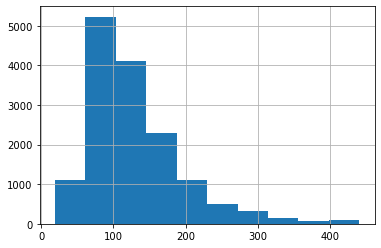

In [4]:
df.price.hist()

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [5]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
pearson_price = df.corr(method='pearson')
# Seleccionamos aquellas con valor mayor a 0.2
pearson_price= pearson_price[abs(pearson_price['price']) > 0.2]['price']
col = pearson_price.keys()
print(pearson_price)

accommodates       0.552183
bathrooms          0.283759
bedrooms           0.517237
guests_included    0.338739
distance_centre   -0.204698
entire_home        0.361313
private_room      -0.357184
price              1.000000
Name: price, dtype: float64


In [6]:
#Obtenemos el nuevo dataframe reducido
df_corr=df.loc[:, col]
df_corr

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


In [7]:
# Contemplamos la matriz de correlacion entre las variables del dataframe reducido
df_corr.corr(method='pearson')

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
accommodates,1.000000,0.342195,0.684226,0.495278,0.052256,0.249384,-0.249088,0.552183
bathrooms,0.342195,1.000000,0.365951,0.228522,0.011396,0.018378,-0.015951,0.283759
bedrooms,0.684226,0.365951,1.000000,0.397340,0.105061,0.242817,-0.239698,0.517237
guests_included,0.495278,0.228522,0.397340,1.000000,0.024110,0.123286,-0.120377,0.338739
distance_centre,0.052256,0.011396,0.105061,0.024110,1.000000,-0.092336,0.091778,-0.204698
entire_home,0.249384,0.018378,0.242817,0.123286,-0.092336,1.000000,-0.987671,0.361313
private_room,-0.249088,-0.015951,-0.239698,-0.120377,0.091778,-0.987671,1.000000,-0.357184
price,0.552183,0.283759,0.517237,0.338739,-0.204698,0.361313,-0.357184,1.000000


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

In [8]:
# Reescalaremos para facilitar la convergencia del entrenamiento 
from sklearn.preprocessing import MinMaxScaler

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
datos = df_corr.values[:,0:7]
scaler_x.fit(datos)
datos_scaled=scaler_x.transform(datos)

precios = df_corr.price.values
# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(precios.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
precios_scaled=scaler_y.transform(precios.reshape(-1, 1))

### COMENTARIOS
Al trabajar con redes neuronales parece una buena práctica reescalar los datos, lo cual facilita una mayor rapidez en la convergencia del entrenamiento. En este caso, al utilizar cada variable intervalos de definición tan dispares, debemos reescalar.

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

### Comentario
Vamos a usar una primera capa oculta de 200 neuronas.
Igual que en el notebook proporcionado, usamos : ReLU, regularización L2, tamaño de mini-batch 100, t.aprendizaje 0.1, y max iter 500

En el segundo caso se emplean 2 capas de 100 neuronas.
El resto de parametros como el primero.

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]
cv_scores_mean_2=[]
cv_scores_std_2=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    # 1 capa de 200
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, datos_scaled, precios_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    
for regul_param in regul_param_range:    
    # 2 capa de 100
    mlp_2=MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    scores_2 = cross_val_score(mlp_2, datos_scaled, precios_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores_mean_2.append(scores_2.mean())
    cv_scores_std_2.append(scores_2.std())

cv_scores_mean, cv_scores_std, cv_scores_mean_2, cv_scores_std_2

([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.01225004077782114,
  -0.012243364484804887,
  -0.012228302978063621],
 [0.0003966419209094001,
  0.00027398866706305716,
  0.00020223707355082873,
  0.00020722075014518695,
  0.0002049348239465782,
  0.00021794733926554157],
 [-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

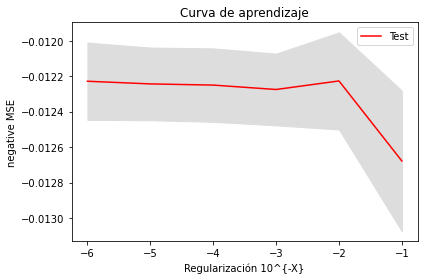

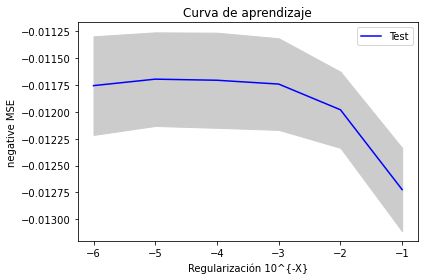

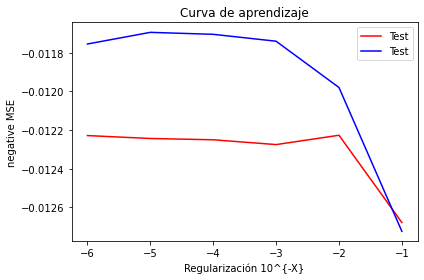

In [10]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="r", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean_2, color="b", label="Test")
# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean_2) - np.array(cv_scores_std_2)
upper_limit = np.array(cv_scores_mean_2) + np.array(cv_scores_std_2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#CCCCCC")
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="r", label="Test")
plt.plot(np.log10(regul_param_range), cv_scores_mean_2, color="b", label="Test")
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

ROJO-1 CAPA 200:Podemos obsevar un comportamiento bastante estable para valores menores que  𝛼=10−2  que resulta ser el mejor valor. (Se puede comprobar en el vector cv_scores_mean ) 

AZUL-2 CAPA 100:Observamos un comportamiento menos estable para valores mayores que  𝛼=10−3. El mejor valor en este caso es 𝛼=10−5. (Se puede comprobar en el vector cv_scores_mean_2 ) 

En la tercera grafica se hace visilbe la red azul domina a la roja. Esto se puede deber a que la red de una sola capa este dejando de aprender o simplemente que ese modelo se adecua peor a este problema.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [11]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.01
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, datos_scaled, precios_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1,1))
predicts=predicts.reshape(1,-1)[0]

In [12]:
# Creamos el clasificador
regul_param_2=0.00001
mlp_2 = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=regul_param_2, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled_2 = cross_val_predict(mlp_2, datos_scaled, precios_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts_2=scaler_y.inverse_transform(predicts_scaled_2.reshape(-1,1))
predicts_2=predicts_2.reshape(1,-1)[0]

#### Por algun motivo interpretaba mal las dimensones de predicst scaled y tuvimos que recurrir a esto

In [13]:
errors = np.abs(precios - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(precios)

print('1 capas 200 neuronas:')
print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

errors_2 = np.abs(precios - predicts_2) # error en cada ejemplo
mean_error_2 = np.mean(errors_2)
std_error_2 = np.std(errors_2)
mean_price_2 = np.mean(df['price'])

print('\n2 capas 100 neuronas:')
print('Error medio:', mean_error_2)
print('Desviación típica:', std_error_2)
print('Error medio en %:', mean_error_2/mean_price_2*100)

1 capas 200 neuronas:
Error medio: 32.35556474849859
Desviación típica: 33.475835718313085
Error medio en %: 24.879274691333674

2 capas 100 neuronas:
Error medio: 31.99620306888545
Desviación típica: 32.5780410688307
Error medio en %: 24.60294949008528


### COMENTARIOS SOBRE EL ERROR

EL ERROR MEDIO DE LA RED DE UNA CAPA ES DE 32.35 €, MIENTRAS QUE EL ERROR MEDIO DE LA RED DE DOS CAPA ES DE 31.99 €

LA DIFERENCIA ENTRE LOS ERRORES MEDIOS ES DE 0.360, QUE TENIENDO EN CUENTA QUE LA MUESTRA DE TRABAJO ES DE 15 MIL DATOS, CONSIDERAMOS NO ES UNA DIFERNECIA NOTABLE.

COMPARANDO EL ERROR CON LA DISTRIBUCION DE LOS PRECIOS DEL DATAFRAME,LA DESV.TIP DEL ERROR (33) CON LA DESV.TIP DE LA DISTRIBUCION (63),
SE OBSERVA CON CLARIDAD QUE EL MODELO NO NOS OFRECE BUENAS PREDICCIONES.

TODO LO ANTERIOR QUEDA RATIFICADO CON EL ERROR MEDIO DEL 24.5% QUE SE ALEJA POR COMPLETO DE LOS VALORES ESPERADOS PARA ESTA MEDIDA, QUE CREEMOS DEBERÍAN ESTAR EN TORNO AL 10% O INFERIOR

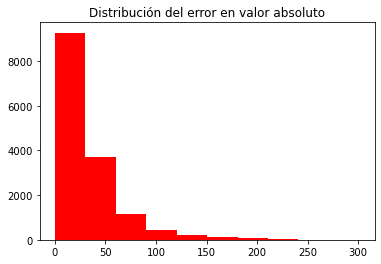

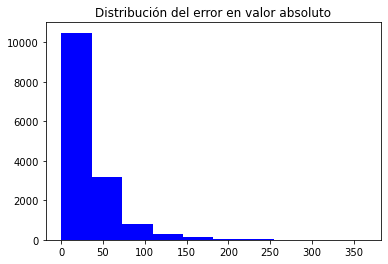

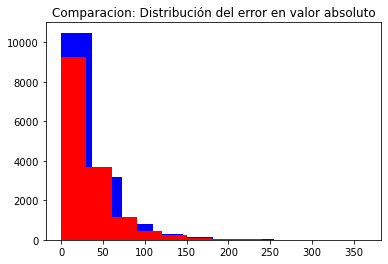

In [14]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors,color="r")
plt.title('Distribución del error en valor absoluto')

# Dibujamos el histograma de los errores
fig3 = plt.figure()
ax3 = plt.axes()
ax3.hist(errors_2,color="b")

plt.title('Distribución del error en valor absoluto')

# Dibujamos el histograma de los errores
fig5 = plt.figure()
ax5 = plt.axes()
ax5.hist(errors_2,color="b")
ax5.hist(errors,color="r")
plt.title('Comparacion: Distribución del error en valor absoluto')
plt.show()

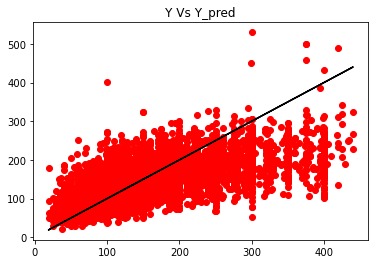

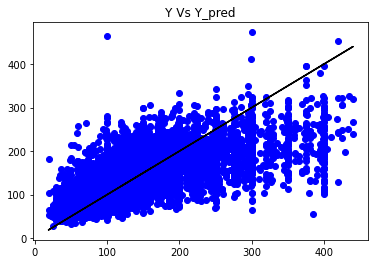

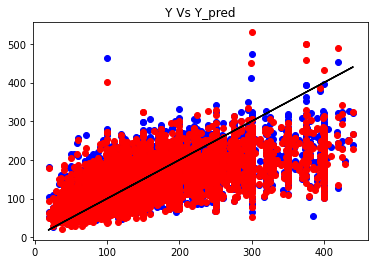

In [15]:
fig2 = plt.figure()
ax2 = plt.axes()
# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(precios, predicts,color="r") 
# Pintamos la referencia de la predicción perfecta
ax2.plot(precios, precios, color='k') 
plt.title('Y Vs Y_pred')

fig4 = plt.figure()
ax4 = plt.axes()
# dibujamos los errores: la distancia a la recta indica el nivel de error
ax4.scatter(precios, predicts_2,color="b") 
# Pintamos la referencia de la predicción perfecta
ax4.plot(precios, precios, color='k') 
plt.title('Y Vs Y_pred')


fig6 = plt.figure()
ax6 = plt.axes()
# dibujamos los errores: la distancia a la recta indica el nivel de error
ax6.scatter(precios, predicts_2,color="b") 
ax6.scatter(precios, predicts,color="r") 
# Pintamos la referencia de la predicción perfecta
ax6.plot(precios, precios, color='k') 
plt.title('Y Vs Y_pred')
plt.show()

### COMENTARIOS
#### ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? 
Mientras que en los alquileres de precios bajos-medios queda reflejado el gran valor que tiene la desviacion tipica, tomando predicciones tanto al alza como a la baja; en los alquileres de precios superiores se aprecia una evidente tendencia a infraestimar el precio de alquiler

#### ¿Por qué crees que se producen esos errores?
Si observamos el histograma del comienzo, los datos se aglomeran en el rango (90,150) por lo que es posible que hagan falta mas muestras de alquileres con precios altos. Esto marca la tendencia de ambas redes a realizar predicciones por debajo del valor real para los alquileres de precios mas altos.

#### Diferencias entre las dos redes
Aunque es complicado apreciarlas, hemos contemplado las siguientes:

La red de dos capas(en azul) predice con menos error generalmente.

En a red de una capa(en rojo) las predicciones que cometen mayor error, cometen menos que las predciiones con mayor error de la red de dos capas; pero acumula menos predicciones con errores bajos.

Para precios bajos ambas tienen un comportamiento similar.

Para precios altos la red de dos capas se ajusta algo mejor, sin ser nada destacable esta mejora.

### CONCLUSION
No deberia hacerse uso de este modelo para este problema debido a su gran imprecision.